# Week 7 - Milestone One week

# 1. Lesson: no lesson this week.  Milestone One is due!

# 2. Weekly graph question

Below are the graphs from last week's weekly graph question.  Suppose you wanted to cause the viewer to examine the last three months of data first.  How could you use preattentive attributes to do that?  Suggest several possibilities.

In [7]:
import numpy as np
import seaborn as sns
import pandas as pd

/tmp/ipykernel_6446/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

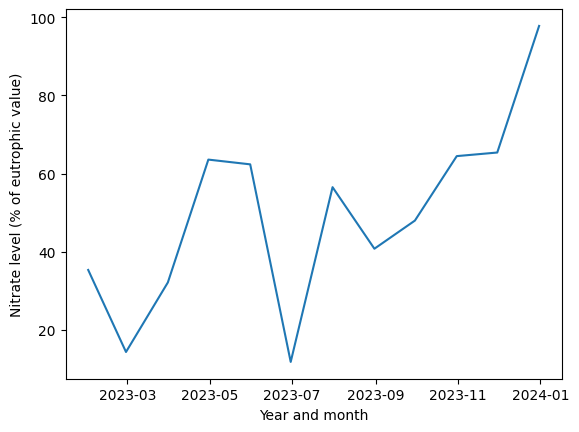

In [8]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_6446/1012779568.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

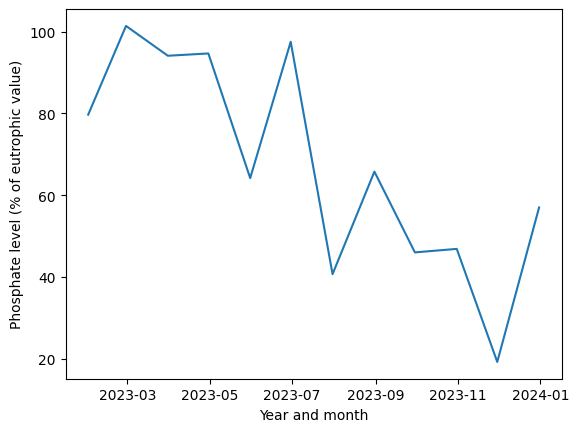

In [9]:
np.random.seed(1)
time_series = 100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

# 3. Working on your datasets

This week, you can work on Milestone One rather than having a particular exercise about working on your datasets

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 99-119 of the Storytelling With Data book as best you can. (The first half of chapter four). You do not have to get the exact data values right, just the overall look and feel.

In [10]:
import matplotlib.pyplot as plt

In [11]:
df_application = pd.read_csv("Credit_Card_Application_Data.csv")

In [12]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone           25128 non-null  int64 
 13  Owned_Email           25128 non-null  int64 
 14  Job_Title             25128 non-null  object
 15  Total_Family_Members  25128 non-null

In [13]:
df_application.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,39,1


/tmp/ipykernel_6446/429456927.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_application.groupby('income_bin').agg(


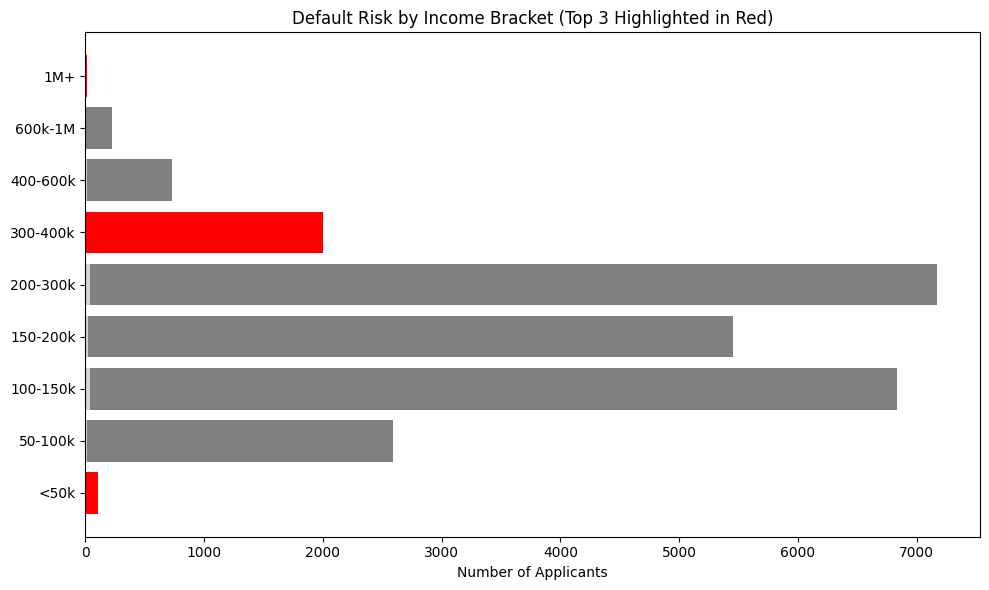

In [14]:
# Define income bins and labels
bins = [0, 50000, 100000, 150000, 200000, 300000, 400000, 600000, 1000000, float('inf')]
labels = ['<50k', '50-100k', '100-150k', '150-200k', '200-300k', 
          '300-400k', '400-600k', '600k-1M', '1M+']

# Bin the income values
df_application['income_bin'] = pd.cut(df_application['Total_Income'], bins=bins, labels=labels)

# Group by income bin
grouped = df_application.groupby('income_bin').agg(
    total=('Applicant_ID', 'count'),
    defaults=('Status', 'sum')  # Assuming 1 = default
).reset_index()

# Calculate non-defaults and default rate
grouped['nondefaults'] = grouped['total'] - grouped['defaults']
grouped['def_rate'] = grouped['defaults'] / grouped['total']

# Identify top 3 bins with highest default rate
top_3_bins = grouped.sort_values('def_rate', ascending=False).head(3)['income_bin'].tolist()

# Reorder income bins from low to high
grouped['income_bin'] = pd.Categorical(grouped['income_bin'], categories=labels, ordered=True)
grouped = grouped.sort_values('income_bin')

# Assign bar colors: red for top 3 riskiest bins, gray otherwise
bar_colors = ['red' if bin in top_3_bins else 'gray' for bin in grouped['income_bin']]

# Set y positions for horizontal bar chart
y_pos = np.arange(len(grouped))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot non-defaults (always light gray)
ax.barh(y_pos, grouped['nondefaults'], color='lightgray')

# Plot defaults with conditional coloring
ax.barh(y_pos, grouped['defaults'], left=grouped['nondefaults'], color=bar_colors)

# Add y-axis labels and title
ax.set_yticks(y_pos)
ax.set_yticklabels(grouped['income_bin'])
ax.set_xlabel('Number of Applicants')
ax.set_title('Default Risk by Income Bracket (Top 3 Highlighted in Red)')

plt.tight_layout()
plt.show()

The chart above has been reproduced based on Figure 4.9 on page 111 of Storytelling With Data. I am creating a visual hierarchy, highlighting the top three default-riskiest income brackets in red.